# F1 score

In [17]:
# calculate precision, recall, f1 score, and accuracy
# TP: true positive
# FP: false positive
# FN: false negative
# TN: true negative
# precision = TP / (TP + FP)
# recall = TP / (TP + FN)
# f1 = 2 * precision * recall / (precision + recall)
# accuracy = (TP + TN) / (TP + FP + FN + TN)

def calculate_metrics(TP, FP, FN, TN):
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2 * precision * recall / (precision + recall)
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    return precision, recall, f1, accuracy


TP = 10
FP = 10
FN = 30
TN = 50
precision, recall, f1, accuracy = calculate_metrics(TP, FP, FN, TN)
print("precision: {:.2f}".format(precision))
print("recall: {:.2f}".format(recall))
print("f1: {:.2f}".format(f1))
print("accuracy: {:.2f}".format(accuracy))

## print these numbers in fraction
# print("precision: {}/{}".format(TP, TP + FP))
# print("recall: {}/{}".format(TP, TP + FN))
# print("f1: {}/{}".format(2 * TP, 2 * TP + FP + FN))
# print("accuracy: {}/{}".format(TP + TN, TP + FP + FN + TN))

precision: 0.50
recall: 0.25
f1: 0.33
accuracy: 0.60


In [2]:
TP = 98
FP = 2
FN = 3
TN = 97
# P1 = P(not disease| +)
p1 = FP / (TP + FN)
# P2 = P(disease| +)
p2 = TP / (TP + FN)
p1/p2


0.020408163265306124

# TF-IDF

In [52]:
# calculate TF-IDF score for a word
import math

# get tf
def get_tf(word, doc):
    count = 0
    # remove all punctuation in one step
    # doc = doc.replace('!', '')
    doc = doc.replace('.', '')
    doc = doc.replace(',', '')
    # split the doc into words
    doc = doc.split()
    print(doc)
    for w in doc:
        if w == word:
            count += 1
    return count / len(doc)

# get idf
def get_idf(word, docs):
    count = 0
    for doc in docs:
        if word in doc:
            count += 1
    return math.log(len(docs)+1 / count+1)

# get tf-idf
def get_tf_idf(word, doc, docs):
    return get_tf(word, doc) * get_idf(word, docs)

In [53]:
doc = "I eat two apples, and you eat one apple."
print(get_tf('apple', doc))

['I', 'eat', 'two', 'apples', 'and', 'you', 'eat', 'one', 'apple']
0.1111111111111111


# IE confidence
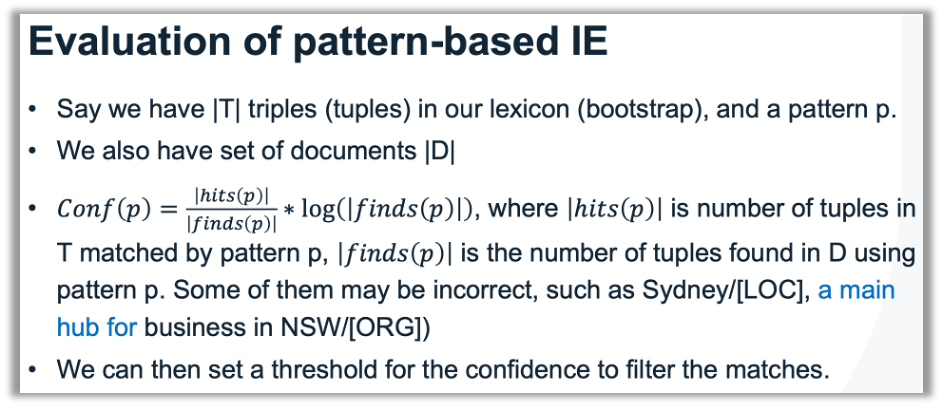

In [5]:
import math

# Evaluation of pattern-based Information Extraction
# confidence of a pattern
def get_pattern_confidence(hits, finds):
    hits = abs(hits)
    finds = abs(finds)
    return (hits/finds)*math.log10(finds)

get_pattern_confidence(1, 3)

0.15904041823988746

# MAP

In [9]:
# calculate MAP for a given query

# 1. calculate AP of one query
def calculate_AP(query, result):
    # calculate AP for one query
    # query: query number
    # result: list of tuples (doc_id, relevance)
    result.sort(key=lambda x: x[1], reverse=True)
    relevant = 0
    total = 0
    AP = 0
    for i, (doc_id, relevance) in enumerate(result):
        total += 1
        if relevance == 1:
            relevant += 1
            AP += relevant / total
    AP /= relevant
    return AP

# 2. calculate MAP of all queries
def calculate_MAP(queries, results):
    # calculate MAP for all queries
    # queries: list of query numbers
    # results: list of lists of tuples (doc_id, relevance)
    MAP = 0
    for query, result in zip(queries, results):
        AP = calculate_AP(query, result)
        MAP += AP
    MAP /= len(queries)
    return MAP

In [15]:
# retrieved 5 documents, second and fourth were relevant, others were not relevant
# calculate MAP for this query
# query = 1
# result = [(1, 0), (2, 1), (3, 0), (4, 1), (5, 0)]
# calculate_MAP(query, result)

# print(calculate_MAP([1], [[(1, 0), (2, 1), (3, 0), (4, 1), (5, 0)]]))
print((1/2 + 1/3 + 2/4 + 2/5)/2)
print(23/30)

0.8666666666666667
0.7666666666666667


# MRR

In [5]:
# calculate MRR (Mean Reciprocal Rank) for a given query

# 1. calculate RR of one query
def calculate_RR(query, result):
    # calculate RR for one query
    # query: query number
    # result: list of tuples (doc_id, relevance)
    for i, (doc_id, relevance) in enumerate(result):
        # reach the first matching document, and return 1 / (i + 1)
        if relevance == 1:
            return 1 / (i + 1)
    return 0

# 2. calculate MRR of all queries
def calculate_MRR(queries, results):
    # calculate MRR for all queries
    # queries: list of query numbers
    # results: list of lists of tuples (doc_id, relevance)
    MRR = 0
    for query, result in zip(queries, results):
        RR = calculate_RR(query, result)
        MRR += RR
    MRR /= len(queries)
    return MRR

# ROUGE

In [18]:
# !pip install evaluate
# !pip install rouge_score

from evaluate import load
# Load the ROUGE metric
import evaluate
rouge = evaluate.load('rouge')
references = [["They walked to the grocery store"]]
candidates = ["The woman went to the hardware store"]
results = rouge.compute(predictions=candidates, references=references)
print(results)
# {'rouge1': 0.5454545454545454, 'rouge2': 0.22222222222222224, 'rougeL': 0.5454545454545454, 'rougeLsum': 0.5454545454545454}

/Users/wzx/anaconda3/envs/anlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'rouge1': 0.4615384615384615, 'rouge2': 0.1818181818181818, 'rougeL': 0.4615384615384615, 'rougeLsum': 0.4615384615384615}


In [6]:
references = [["the cat was found under the bed"]]
candidates = ["the cat bed was under the"]
results = rouge.compute(predictions=candidates, references=references)
print(results)
# {'rouge1': 0.923076923076923, 'rouge2': 0.3636363636363636, 'rougeL': 0.7692307692307692, 'rougeLsum': 0.7692307692307692}

{'rouge1': 0.923076923076923, 'rouge2': 0.3636363636363636, 'rougeL': 0.7692307692307692, 'rougeLsum': 0.7692307692307692}


In [7]:
print(10/13)

0.7692307692307693


# chrF

In [23]:
# calculate chrFβ for machine translation evaluation
# ignore spaces but count punctuation marks

# 1. calculate precision
def calculate_precision(hypothesis, reference, n):
    # calculate precision for n-gram
    # hypothesis: list of words in hypothesis
    # reference: list of words in reference
    # n: n-gram
    count = 0
    for i in range(len(hypothesis) - n + 1):
        ngram = hypothesis[i:i+n]
        if ngram in reference:
            count += 1
    return count / (len(hypothesis) - n + 1)

# 2. calculate recall
def calculate_recall(hypothesis, reference, n):
    # calculate recall for n-gram
    # hypothesis: list of words in hypothesis
    # reference: list of words in reference
    # n: n-gram
    count = 0
    for i in range(len(hypothesis) - n + 1):
        ngram = hypothesis[i:i+n]
        if ngram in reference:
            count += 1
    return count / (len(reference) - n + 1)

# 3. calculate Fβ
def calculate_F(hypothesis, reference, n, β):
    # calculate Fβ for n-gram
    # hypothesis: list of words in hypothesis
    # reference: list of words in reference
    # n: n-gram
    # β: β value, default is 2

    # remove spaces
    hypothesis = hypothesis.replace(' ', '')
    reference = reference.replace(' ', '')
    # calculate precision and recall from 1-gram to n-gram
    sum_precision = 0
    sum_recall = 0
    for i in range(1, n+1):
        sum_precision += calculate_precision(hypothesis, reference, i)
        sum_recall += calculate_recall(hypothesis, reference, i)
    precision = sum_precision / n
    recall = sum_recall / n
    # calculate Fβ
    F = (1 + β**2) * precision * recall / (β**2 * precision + recall)
    return F

In [25]:
print(calculate_F('cat on the mat', 'cat on a mat', 2, 1))

0.7833572453371593


In [6]:
precision =7/8
recall = 78/110
precision, recall
f1 = 2 * precision * recall / (precision + recall)
f1

0.7833572453371593

In [55]:
# chrP score function
def calculate_chrP(hypothesis, reference, n):
    # calculate chrP for n-gram
    # hypothesis: list of words in hypothesis
    # reference: list of words in reference
    # n: n-gram
    # remove spaces
    hypothesis = hypothesis.replace(' ', '')
    reference = reference.replace(' ', '')
    # calculate precision from 1-gram to n-gram
    sum_precision = 0
    for i in range(1, n+1):
        sum_precision += calculate_precision(hypothesis, reference, i)
    chrP = sum_precision / n
    return chrP

calculate_chrP('dock', 'clock', 2)

0.7083333333333333

# BLEU

## brevity penalty

In [56]:
# calculate the brevity penalty BP
def calculate_BP(c, r):
    # calculate brevity penalty
    # c: number of words in candidate translation
    # r: number of words in reference translation
    if c > r:
        BP = 1
    else:
        BP = math.exp(1 - r / c)
    return BP

bp = calculate_BP(3, 4)
print(bp)

0.7165313105737893


In [48]:
# calculate BLEUn score with word 1 to 4 grams

# get clipped count (not used in get_precision function)
def get_clipped_count(hypothesis, reference, n):
    # get clipped count for n-gram
    # hypothesis: list of words in hypothesis
    # references: list of list of words in reference
    count = 0
    ngram_reference = []
    for i in range(len(reference) - n + 1):
        ngram = reference[i:i+n]
        ngram_reference.append(''.join(ngram).lower())
    print(ngram_reference)

    for i in range(len(hypothesis) - n + 1):
        ngram = hypothesis[i:i+n]
        ngram = ''.join(ngram).lower()
        # print(ngram)
        if ngram in ngram_reference:
            count += 1
            ngram_reference.remove(ngram)
    return count

# get precision of word matches
def get_precision(hypothesis, reference, n):
    # get precision for n-gram
    # hypothesis: list of words in hypothesis
    # references: list of list of words in reference
    count = 0
    ngram_reference = []
    for i in range(len(reference) - n + 1):
        ngram = reference[i:i+n]
        ngram_reference.append(''.join(ngram).lower())
    # print(ngram_reference)

    for i in range(len(hypothesis) - n + 1):
        ngram = hypothesis[i:i+n]
        ngram = ''.join(ngram).lower()
        # print(ngram)
        if ngram in ngram_reference:
            count += 1
            ngram_reference.remove(ngram) # remove the matched ngram for clipped precision
    precision = count / (len(hypothesis) - n + 1)
    print(precision)
    return precision

# calculate BLEU-4
def calculate_BLEU(hypothesis, reference):
    # calculate BLEU-4
    # hypothesis: list of words in hypothesis
    # references: list of list of words in reference

    # split hypothesis, references into words
    hypothesis = hypothesis.split()
    reference = reference.split()
    
    # calculate brevity penalty
    if len(hypothesis) > len(reference):
        brevity_penalty = 1
    else:
        brevity_penalty = math.exp(1 - len(reference) / len(hypothesis))

    
    # calculate precision for 1-gram to 4-gram
    precision = 1
    for i in range(1, 5):
        # to the power of 0.25
        # discard precision if it is 0
        if get_precision(hypothesis, reference, i) > 0:
            precision *= get_precision(hypothesis, reference, i)**0.25
    # calculate BLEU-4
    print(brevity_penalty)
    BLEU = brevity_penalty * precision
    return BLEU

In [49]:
ref = "He  he eats a sweet apple"
hyp = "He He He eats"

print(calculate_BLEU(hyp, ref))

0.75
0.75
0.6666666666666666
0.6666666666666666
0.5
0.5
0.0
0.6065306597126334
0.4288819424803534
